In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'C:\Users\diana\OneDrive\Bureau\Labs\IHack/learningSet.csv')
df

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [5]:
# Select only the numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['number'])

# Check for null values in the numerical columns
null_values_numerical = numerical_columns.isnull().sum()

print(null_values_numerical)

ODATEDW         0
TCODE           0
DOB             0
AGE         23665
NUMCHLD     83026
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 407, dtype: int64


In [12]:
# Check the 'GEOCODE2' column:
df["GEOCODE2"].value_counts()

GEOCODE2
A    34484
B    28505
D    16580
C    15524
       187
Name: count, dtype: int64

In [13]:
df['GEOCODE2'] = df['GEOCODE2'].astype('object')

In [14]:
# Check the 'WEALTH1' column:
df["WEALTH1"].value_counts()

WEALTH1
9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: count, dtype: int64

In [15]:
df['WEALTH1'] = df['WEALTH1'].fillna(df['WEALTH1'].median())

In [16]:
# Check the 'ADI' column:
df["ADI"].value_counts()

ADI
13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: count, Length: 204, dtype: int64

In [17]:
df['ADI'] = df['ADI'].fillna(df['ADI'].median())

In [18]:
# Check the 'DMA' column:
df["DMA"].value_counts()

DMA
803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: count, Length: 206, dtype: int64

In [19]:
df['DMA'] = df['DMA'].fillna(df['DMA'].median())

In [20]:
# Check the 'MSA' column:
df["MSA"].value_counts()

MSA
0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: count, Length: 298, dtype: int64

In [21]:
df['MSA'] = df['MSA'].fillna(df['MSA'].median())

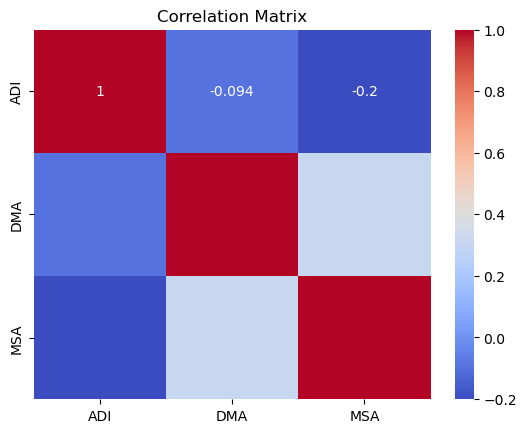

In [27]:
# Correlation matrix 
corr_matrix = df[['ADI', 'DMA', 'MSA']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()